### Preprocesare fisiere gml

In [1]:
# Este nevoie de o preprocesare a fisierelor, deoarece unele contin muchii duplicate (acelasi source si acelasi target)

def preprocessing_gml(input_path, output_path):
    with open(input_path, 'r') as f:
        lines = f.readlines()

    result = []
    edge_set = set()
    inside_edge_block = False
    current_edge_lines = []
    current_source = None
    current_target = None

    for line in lines:
        stripped = line.strip()

        if stripped == 'edge [':
            inside_edge_block = True
            current_edge_lines = [line]
            current_source = None
            current_target = None
            continue

        if inside_edge_block:
            current_edge_lines.append(line)

            if stripped.startswith('source'):
                current_source = stripped.split()[1]
            elif stripped.startswith('target'):
                current_target = stripped.split()[1]
            elif stripped == ']':
                inside_edge_block = False
                if current_source is not None and current_target is not None:
                    # Normalizează perechea (ex: (2, 5) sau (5, 2) devine (2, 5))
                    edge_tuple = tuple(sorted((current_source, current_target)))
                    if edge_tuple not in edge_set:
                        edge_set.add(edge_tuple)
                        result.extend(current_edge_lines)
                current_edge_lines = []
            continue

        result.append(line)

    with open(output_path, 'w') as f:
        f.writelines(result)

### Incarcarea datelor pentru un graf:

In [2]:
import networkx as nx

def load_gml_graph(filename):
    try:
        graph = nx.read_gml(filename, label=None)
        graph = nx.convert_node_labels_to_integers(graph) # construim graful astfel incat cheile nodurilor sa fie id-urile (numeric)
        print(f'Graph loaded from {filename}: {len(graph.nodes)} nodes and {len(graph.edges)} edges')
        return graph
    except Exception as e:
        print(f'Failed to load graph from {filename}: {e}')
        return None

### Identificarea comunitatilor folosind functii din biblioteci specializate (networkx)

In [3]:
from networkx.algorithms.community import greedy_modularity_communities

def get_communities(graph):
    communities = greedy_modularity_communities(graph)
    number_of_communities = len(communities)

    result = [0 for _ in range(graph.number_of_nodes())]
    i = 1
    for community in communities:
        for node in community:
            result[node] = i
        i += 1

    return number_of_communities, result

### Vizualizare grafica a comunitatilor

In [4]:
import matplotlib.pyplot as plt

def show_communities(G, communities, title, size=(13,13)):
    pos = nx.spring_layout(G)
    plt.figure(figsize=size)
    nx.draw_networkx_nodes(G, pos, node_size = 600, cmap = plt.cm.RdYlBu, node_color = communities)
    nx.draw_networkx_edges(G, pos, alpha = 0.3)
    plt.title(title)
    plt.show(G)

### Calculul performantei

In [5]:
# functia de evaluare a performantei folosita - modularitate (se doreste a fi maximizata)
# masoara diferenta dintre proportia de muchii in comunitati si proportia asteptata daca muchiile ar fi distribuite aleator

def modularity(G, communities):
    Q = 0 # valorea functiei
    E = G.number_of_edges() # nr muchii
    degrees = dict(G.degree()) # {nod: grad}

    for i in range(G.number_of_nodes()):
        for j in range(G.number_of_nodes()):
            if i != j:
                if communities[i] == communities[j]:
                    Q += int(G.has_edge(i, j)) - float(degrees[i] * degrees[j] / (2 * E))

    return Q / (2 * E)

### Functie pentru afisarea rezultatelor pentru graful incarcat dintr-un fisier

In [5]:
def compute_all(graph_name: str):
    print(graph_name)

    graph = load_gml_graph(f'networks/{graph_name}/{graph_name}_preprocessed.gml')
    number_of_communities, communities = get_communities(graph)

    print(f'Number of communities: {number_of_communities}')
    print(f'Communities: {communities}')

    show_communities(graph, communities, title = f'Communities for {graph_name} network')
    print(f'Modularity value: {modularity(graph, communities)}')

### Preprocesare fisiere gml

In [6]:
import os

root_path = 'networks'

for root, dirs, files in os.walk(root_path):
    for file in files:
        if file.endswith('.gml'):
            filename = f'{root}/{file}'
            output_filename = f'{filename[:-4]}_preprocessed.gml'
            preprocessing_gml(filename, output_filename)

### Determinare comunitati folosind functii predefinite in libraria **networkx**

dolphins
Graph loaded from networks/dolphins/dolphins_preprocessed.gml: 62 nodes and 159 edges
Number of communities: 4
Communities: [1, 2, 1, 3, 3, 2, 2, 2, 3, 2, 1, 3, 1, 2, 1, 3, 1, 2, 3, 2, 1, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 3, 4, 1, 1, 4, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1, 2, 3, 2, 2, 1, 3, 2, 1]


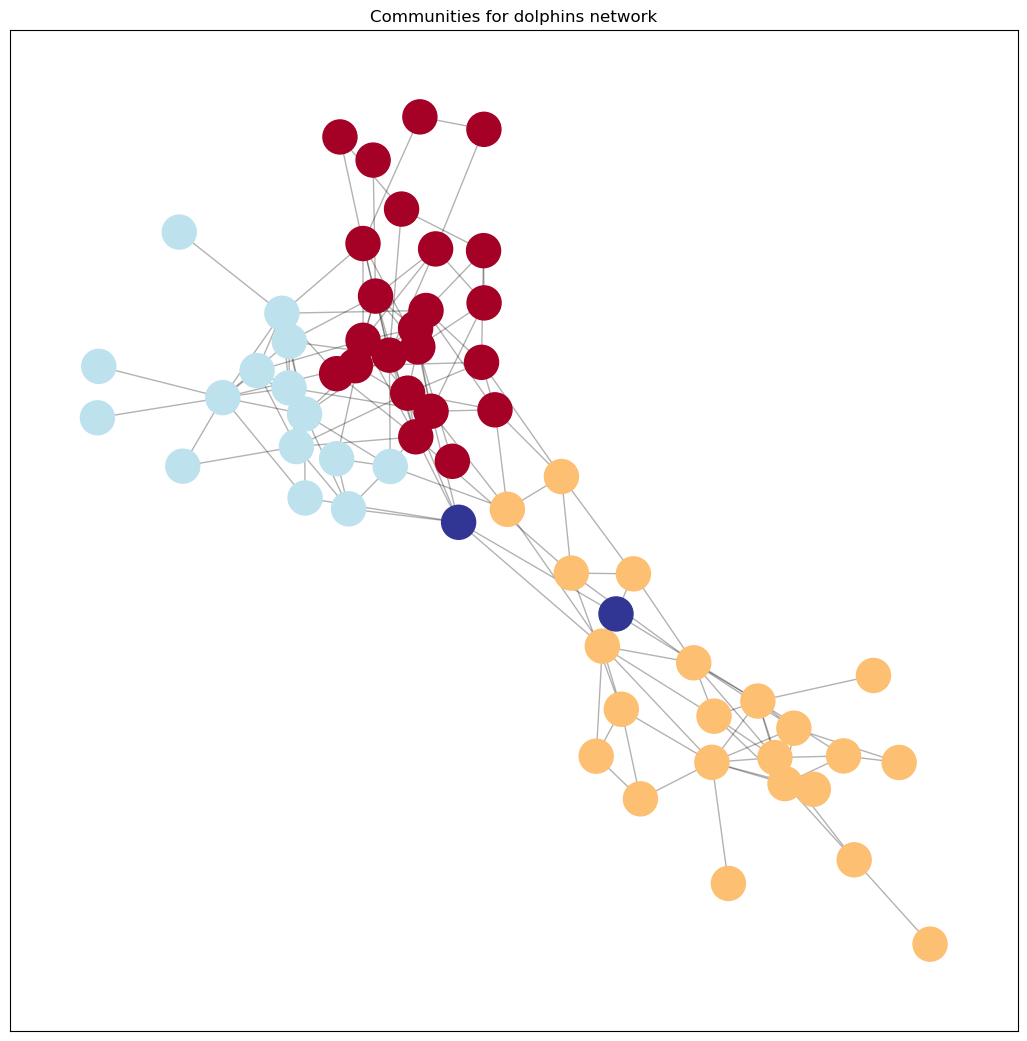

Modularity value: 0.5168901546616029
football
Graph loaded from networks/football/football_preprocessed.gml: 115 nodes and 613 edges
Number of communities: 6
Communities: [4, 4, 3, 3, 3, 3, 6, 2, 2, 2, 3, 3, 5, 6, 5, 6, 2, 1, 5, 4, 1, 2, 2, 2, 3, 4, 5, 1, 3, 4, 4, 5, 6, 4, 5, 4, 1, 4, 5, 6, 3, 2, 1, 5, 1, 4, 2, 6, 1, 2, 3, 2, 3, 2, 5, 4, 1, 1, 1, 1, 6, 5, 1, 1, 6, 1, 1, 2, 2, 3, 1, 5, 3, 2, 3, 1, 1, 2, 2, 4, 4, 3, 4, 3, 3, 5, 1, 1, 2, 4, 3, 1, 1, 4, 4, 1, 1, 1, 3, 5, 6, 4, 3, 4, 2, 4, 6, 3, 2, 4, 2, 2, 1, 1, 2]


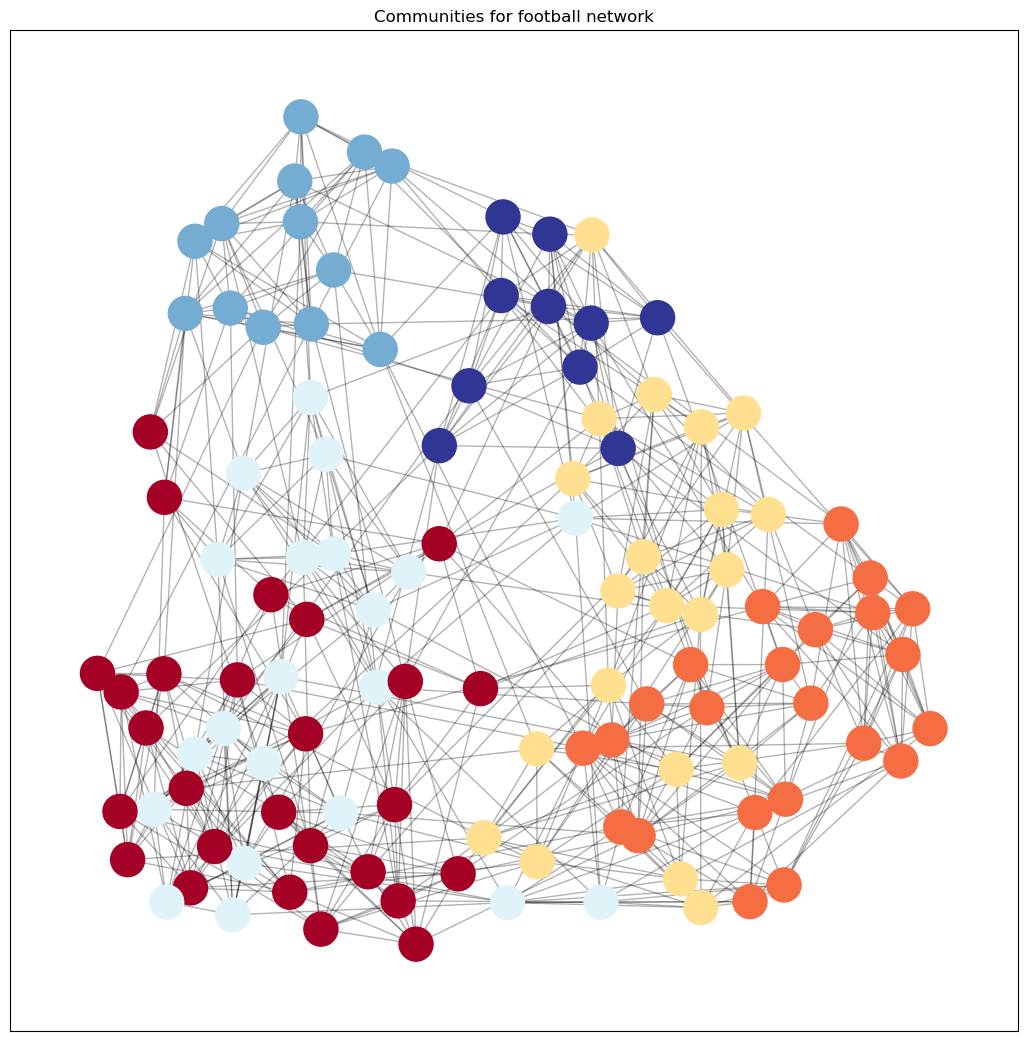

Modularity value: 0.5584960441121969
karate
Graph loaded from networks/karate/karate_preprocessed.gml: 34 nodes and 78 edges
Number of communities: 3
Communities: [3, 2, 2, 2, 3, 3, 3, 2, 1, 2, 3, 3, 2, 2, 1, 1, 3, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


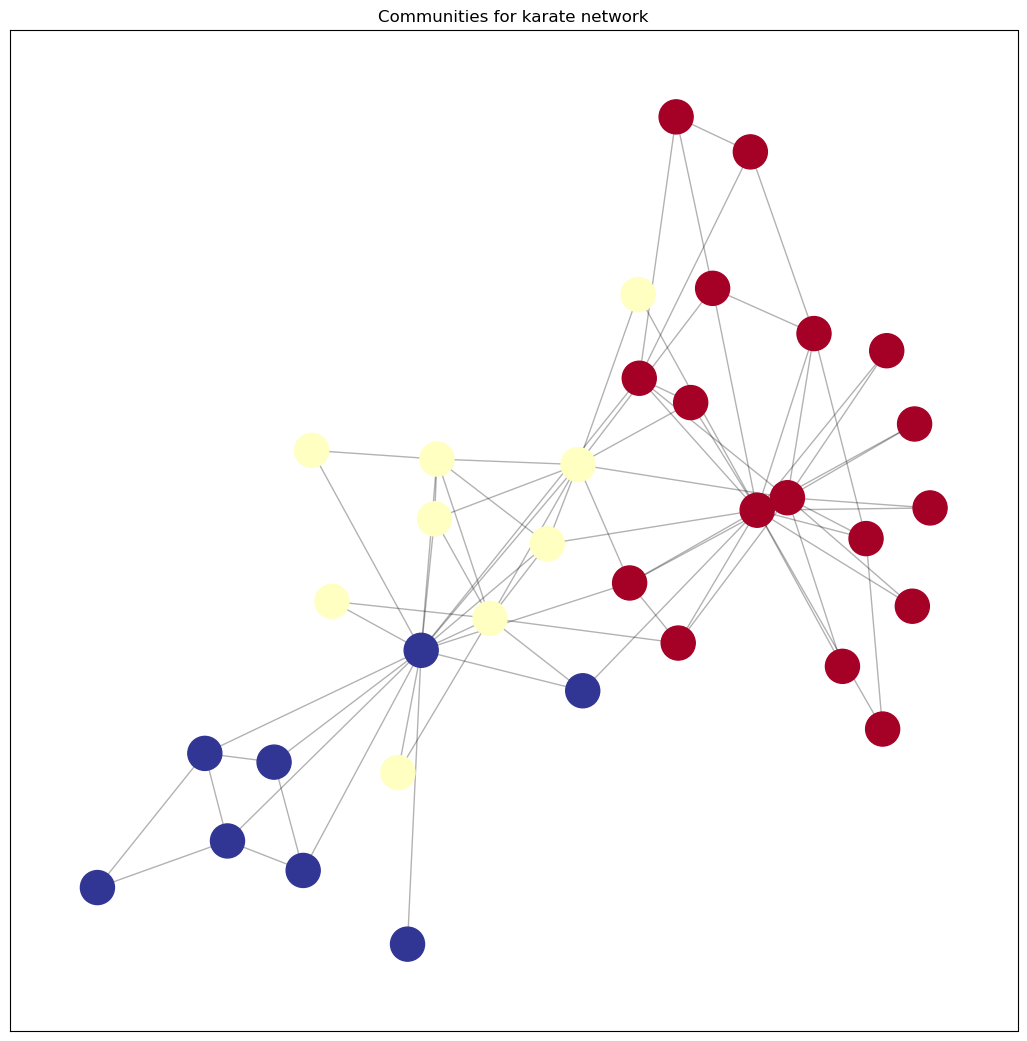

Modularity value: 0.4304733727810635
krebs
Graph loaded from networks/krebs/krebs_preprocessed.gml: 105 nodes and 441 edges
Number of communities: 4
Communities: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 1, 1, 1, 1, 4, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3]


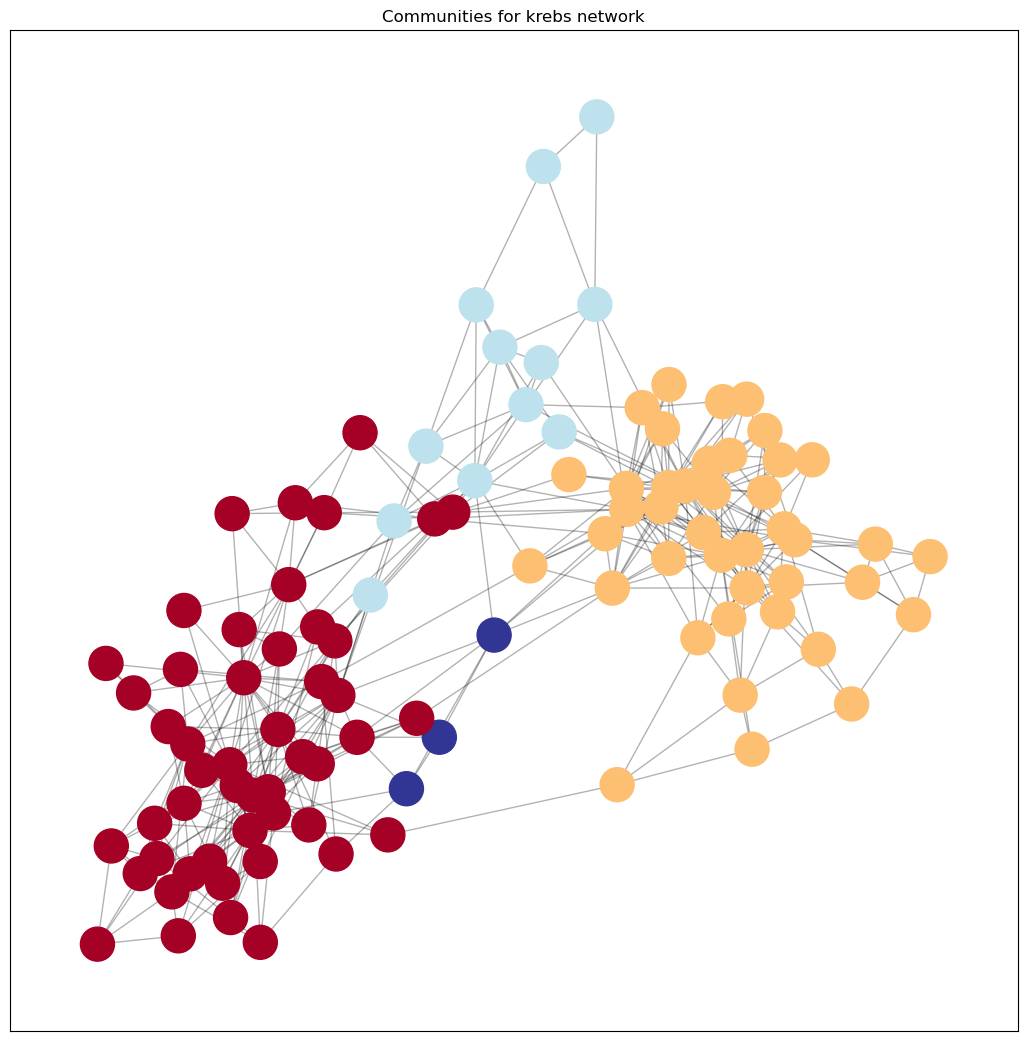

Modularity value: 0.5155053707046113
lesmiserables
Graph loaded from networks/lesmiserables/lesmiserables_preprocessed.gml: 77 nodes and 254 edges
Number of communities: 5
Communities: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 5, 5, 5, 5, 5, 5, 3, 3, 3, 4, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 4, 3, 3, 3, 4, 1, 1, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 2, 2, 3, 2]


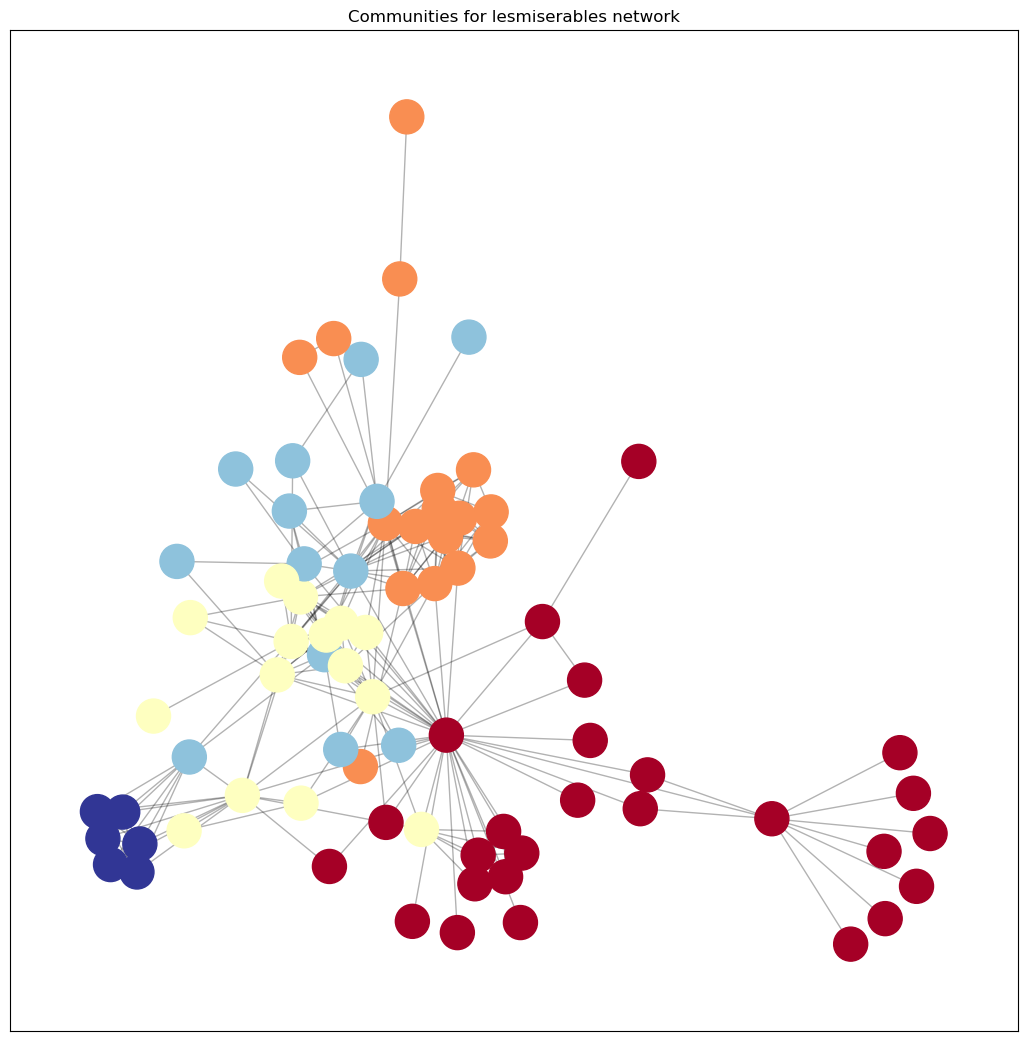

Modularity value: 0.5243272986546003
netscience
Graph loaded from networks/netscience/netscience_preprocessed.gml: 1589 nodes and 2742 edges
Number of communities: 404
Communities: [90, 90, 51, 51, 51, 51, 51, 31, 31, 31, 31, 31, 27, 27, 27, 27, 104, 104, 104, 277, 105, 105, 105, 33, 33, 33, 278, 106, 106, 106, 1, 1, 1, 1, 1, 40, 40, 40, 40, 40, 40, 279, 175, 175, 9, 9, 9, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 107, 107, 107, 6, 6, 6, 6, 108, 108, 108, 2, 2, 2, 2, 4, 4, 4, 4, 5, 5, 5, 5, 29, 29, 29, 109, 109, 109, 28, 28, 280, 1, 110, 110, 110, 2, 2, 2, 2, 2, 2, 2, 281, 111, 111, 111, 85, 85, 85, 176, 176, 282, 177, 177, 1, 1, 283, 45, 45, 54, 54, 1, 1, 112, 112, 112, 284, 2, 2, 2, 178, 178, 1, 1, 1, 1, 3, 3, 179, 179, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 2, 2, 2, 2, 66, 66, 66, 66, 2, 2, 285, 180, 180, 2, 2, 181, 181, 124, 124, 286, 86, 86, 86, 113, 113, 113, 87, 87, 87, 287, 114, 114, 114, 182, 182, 1, 1, 1, 43, 43, 43, 1, 9, 9, 9, 9, 52, 52, 52, 52, 52, 33, 33, 33, 2, 288, 183, 183,

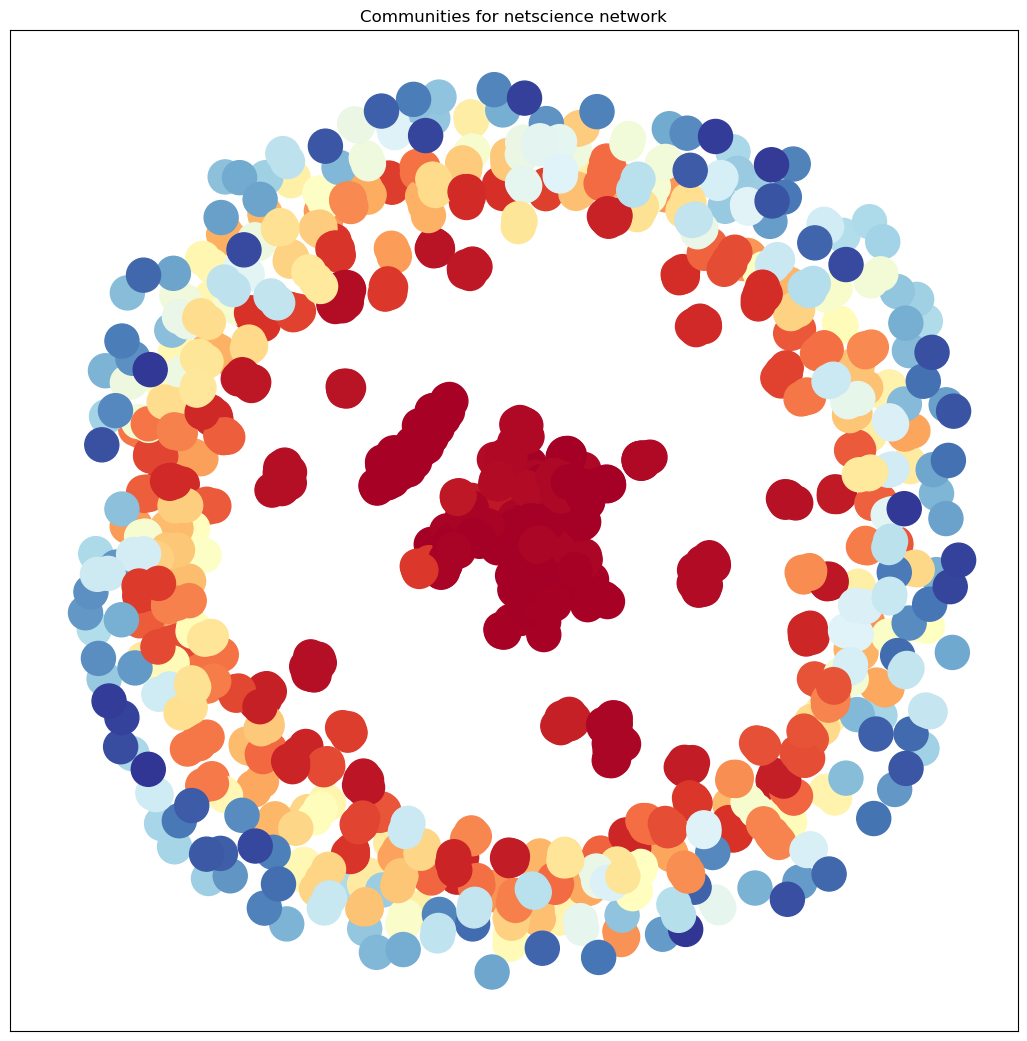

Modularity value: 0.9563985888794032
polblogs
Graph loaded from networks/polblogs/polblogs_preprocessed.gml: 1490 nodes and 16718 edges
Number of communities: 277
Communities: [2, 2, 12, 13, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 14, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 15, 16, 17, 2, 2, 2, 18, 2, 2, 19, 2, 2, 20, 21, 2, 22, 2, 2, 2, 2, 2, 2, 2, 23, 2, 2, 24, 2, 3, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 25, 2, 2, 26, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 27, 2, 2, 28, 29, 2, 2, 2, 2, 2, 2, 1, 30, 2, 31, 2, 2, 2, 32, 2, 3, 2, 2, 33, 2, 5, 34, 35, 1, 2, 2, 36, 2, 2, 2, 2, 2, 2, 37, 2, 38, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 2, 40, 2, 2, 41, 2, 2, 2, 2, 42, 2, 2, 2, 8, 43, 2, 44, 2, 2, 2, 2, 2, 10, 45, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 46, 47, 48, 2, 49, 2, 2, 2, 1, 2, 2, 50, 2, 5, 2, 2, 2, 2, 8, 51, 3, 1, 2, 2, 2, 2, 52, 2, 2, 2, 3, 53, 2, 54, 2, 1, 55, 56, 2, 57, 2, 58, 2, 2, 2, 59, 2, 60, 2, 2, 2, 2, 61, 2, 2, 2, 62, 2, 2, 63, 2, 2, 2,

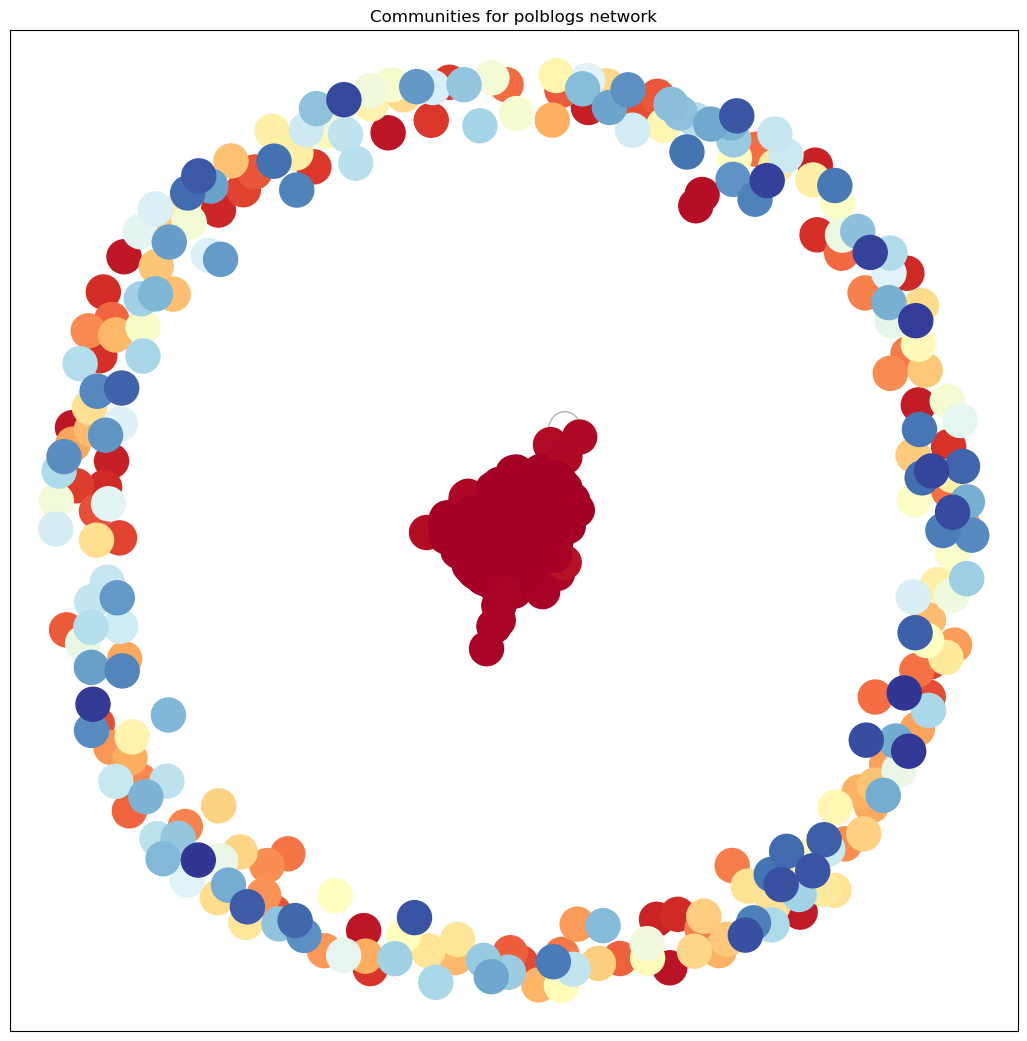

Modularity value: 0.42925215327785965
polbooks
Graph loaded from networks/polbooks/polbooks_preprocessed.gml: 105 nodes and 441 edges
Number of communities: 4
Communities: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 1, 1, 1, 1, 4, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3]


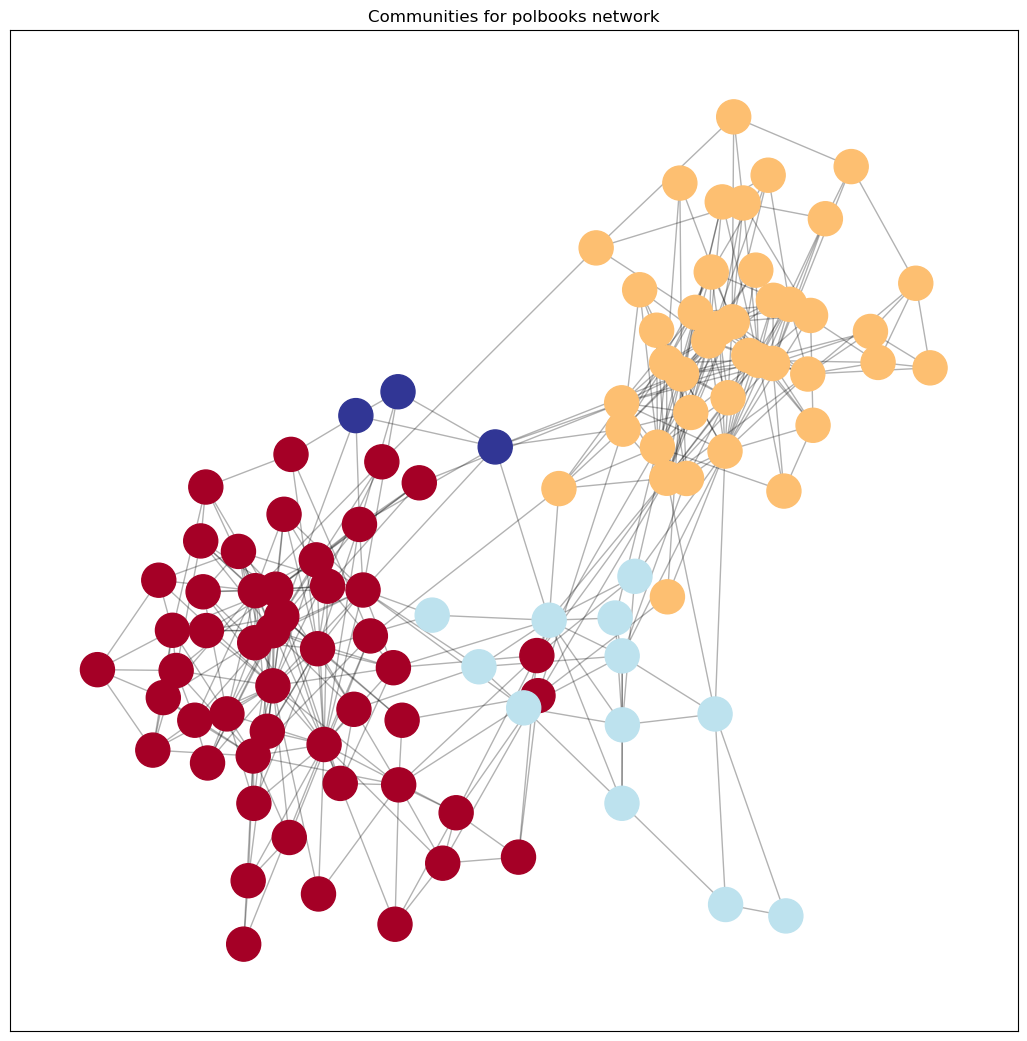

Modularity value: 0.5155053707046113
power
Graph loaded from networks/power/power_preprocessed.gml: 4941 nodes and 6594 edges
Number of communities: 43
Communities: [17, 8, 8, 1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 15, 34, 34, 10, 10, 10, 15, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 15, 10, 10, 10, 34, 10, 10, 10, 15, 10, 10, 10, 10, 10, 26, 26, 26, 26, 7, 26, 26, 7, 10, 34, 34, 15, 10, 10, 10, 10, 10, 10, 15, 15, 10, 34, 10, 10, 10, 10, 10, 10, 34, 10, 10, 10, 10, 10, 10, 15, 15, 15, 10, 10, 10, 10, 26, 10, 10, 7, 10, 10, 10, 34, 34, 10, 10, 7, 7, 7, 10, 10, 10, 10, 10, 10, 10, 7, 7, 7, 7, 10, 10, 34, 15, 15, 15, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 7, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 7, 7, 10, 10, 10, 10, 10

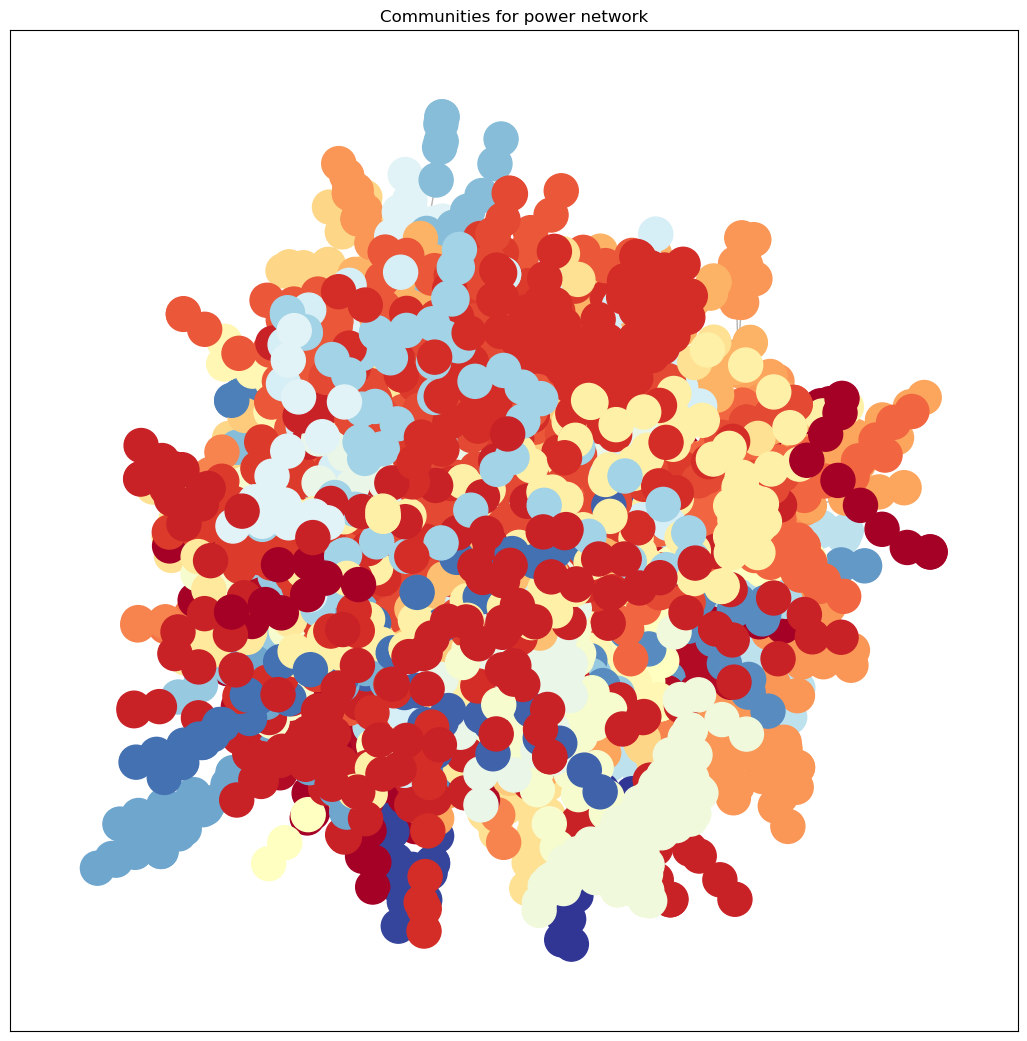

Modularity value: 0.9348600036109502
word_adjacencies
Graph loaded from networks/word_adjacencies/word_adjacencies_preprocessed.gml: 112 nodes and 425 edges
Number of communities: 7
Communities: [2, 2, 2, 2, 4, 4, 1, 1, 2, 2, 5, 5, 5, 1, 1, 6, 1, 3, 5, 2, 4, 5, 2, 1, 1, 2, 2, 4, 3, 7, 3, 3, 3, 3, 3, 3, 1, 1, 1, 4, 2, 2, 2, 4, 5, 2, 2, 1, 5, 1, 5, 1, 3, 5, 1, 1, 2, 1, 7, 1, 6, 2, 6, 4, 4, 3, 1, 1, 1, 5, 1, 6, 1, 2, 7, 1, 6, 2, 5, 4, 4, 4, 3, 4, 3, 2, 3, 1, 6, 5, 2, 2, 6, 3, 4, 6, 6, 2, 4, 5, 4, 6, 5, 3, 3, 1, 6, 3, 1, 4, 4, 2]


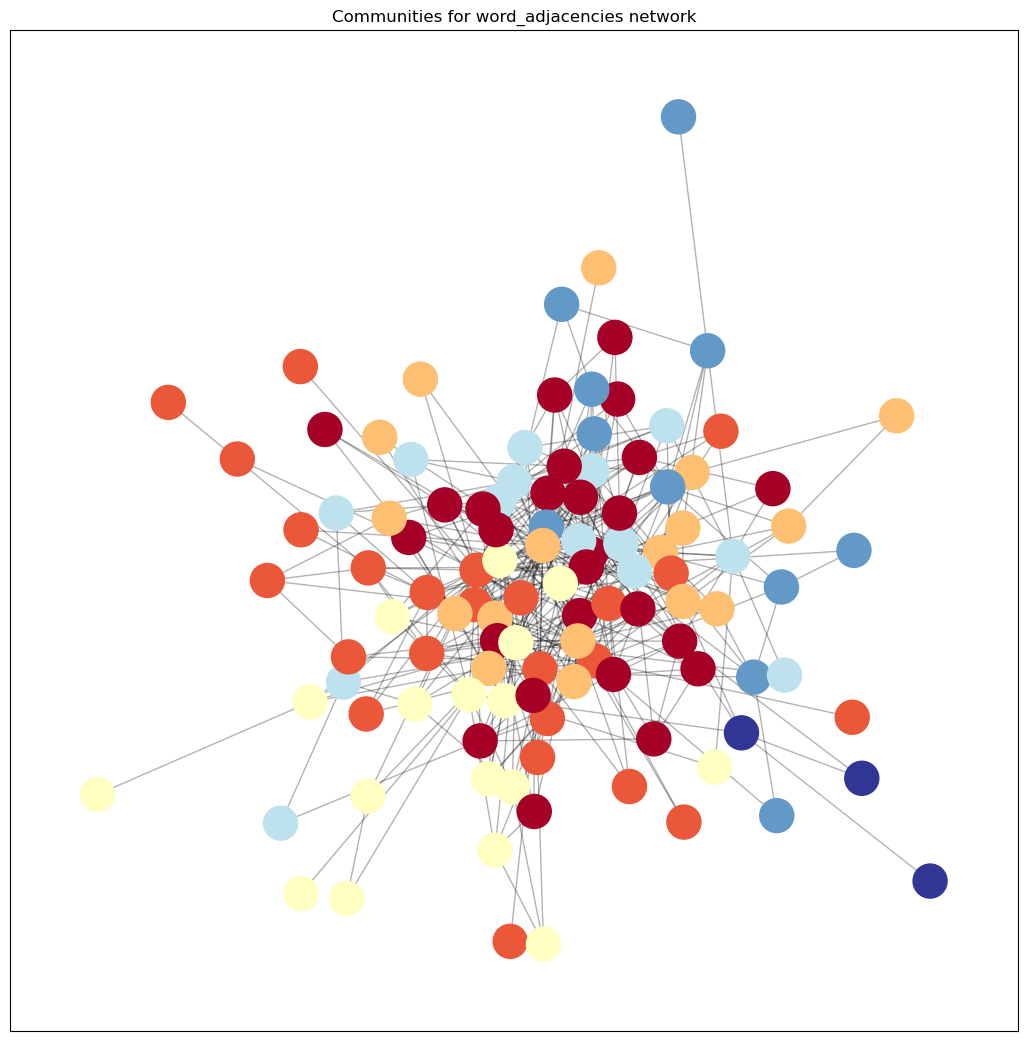

Modularity value: 0.31090103806228486


In [9]:
# graful cu delfini
compute_all('dolphins')

# graful cu fotbal
compute_all('football')

# graful cu karate
compute_all('karate')

# graful cu krebs
compute_all('krebs')

# graful cu lesmiserables
compute_all('lesmiserables')

# graful cu netscience
compute_all('netscience')

# graful cu polblogs
compute_all('polblogs')

# graful cu polbooks
compute_all('polbooks')

# graful cu power
compute_all('power')

# graful cu word_adjacencies
compute_all('word_adjacencies')

### Functie pentru comunitati folosind un algoritm evolutiv implementat de mine (GA)

In [7]:
from EvolutiveAlgorithm import *

def compute_all_EA(graph_name: str, param: dict, problem_param: dict):
    print(graph_name)

    graph = load_gml_graph(f'networks/{graph_name}/{graph_name}_preprocessed.gml')
    problem_param['data'] = graph
    problem_param['size'] = graph.number_of_nodes()

    ga = GA(param, problem_param)
    ga.initialization() # initializare populatie
    ga.evaluation() # evaluare fitness populatie

    solution, best_fitnesses, average_fitnesses = ga.solution()

    print(f'Number of communities: {len(set(solution))}')
    print(f'Communities: {solution}')

    show_communities(graph, solution, title = f'Communities for {graph_name} network')
    print(f'Modularity value: {modularity(graph, solution)}')

### Functii de fitness (modularitate + 2 extra)

In [15]:
# functia de modularitate adaptata pentru penalizarea unui numar prea mare de comunitati
def modularity_for_fitness(G, communities, alpha = 0.1):
    Q = modularity(G, communities)
    return Q - alpha * (len(set(communities)) / len(communities))

# functia Intra-/Inter-comunități ratio (Density ratio) - cat mai multe muchii interne, cat mai putine intre comunitati
def edge_density_fitness(G, communities):
    intra_edges = 0
    inter_edges = 0

    for u, v in G.edges():
        if communities[u] == communities[v]:
            intra_edges += 1
        else:
            inter_edges += 1

    eps = 1e-5 # pentru a evita impartirea la 0
    return intra_edges / (inter_edges + eps)

# functia Silhouette-like score (adaptat pentru grafuri)
def silhouette_fitness(G, communities):
    result = 0

    for node in G.nodes():
        neigh_in_comm = 0
        neigh_out_comm = 0
        for neighbour in G.neighbors(node):
            if communities[node] == communities[neighbour]:
                neigh_in_comm += 1
            else:
                neigh_out_comm += 1
        result += (neigh_in_comm - neigh_out_comm) / G.degree(node)

    return result

### Determinare comunitati folosind algoritmul genetic implementat de mine

dolphins
Graph loaded from networks/dolphins/dolphins_preprocessed.gml: 62 nodes and 159 edges
Number of communities: 7
Communities: [1, 2, 3, 1, 3, 4, 4, 2, 1, 4, 3, 5, 6, 4, 6, 1, 6, 2, 1, 2, 1, 1, 2, 5, 5, 2, 2, 2, 3, 5, 3, 7, 7, 6, 6, 4, 1, 6, 6, 5, 1, 4, 3, 6, 6, 1, 6, 3, 2, 6, 6, 5, 6, 5, 4, 1, 4, 4, 6, 1, 2, 2]


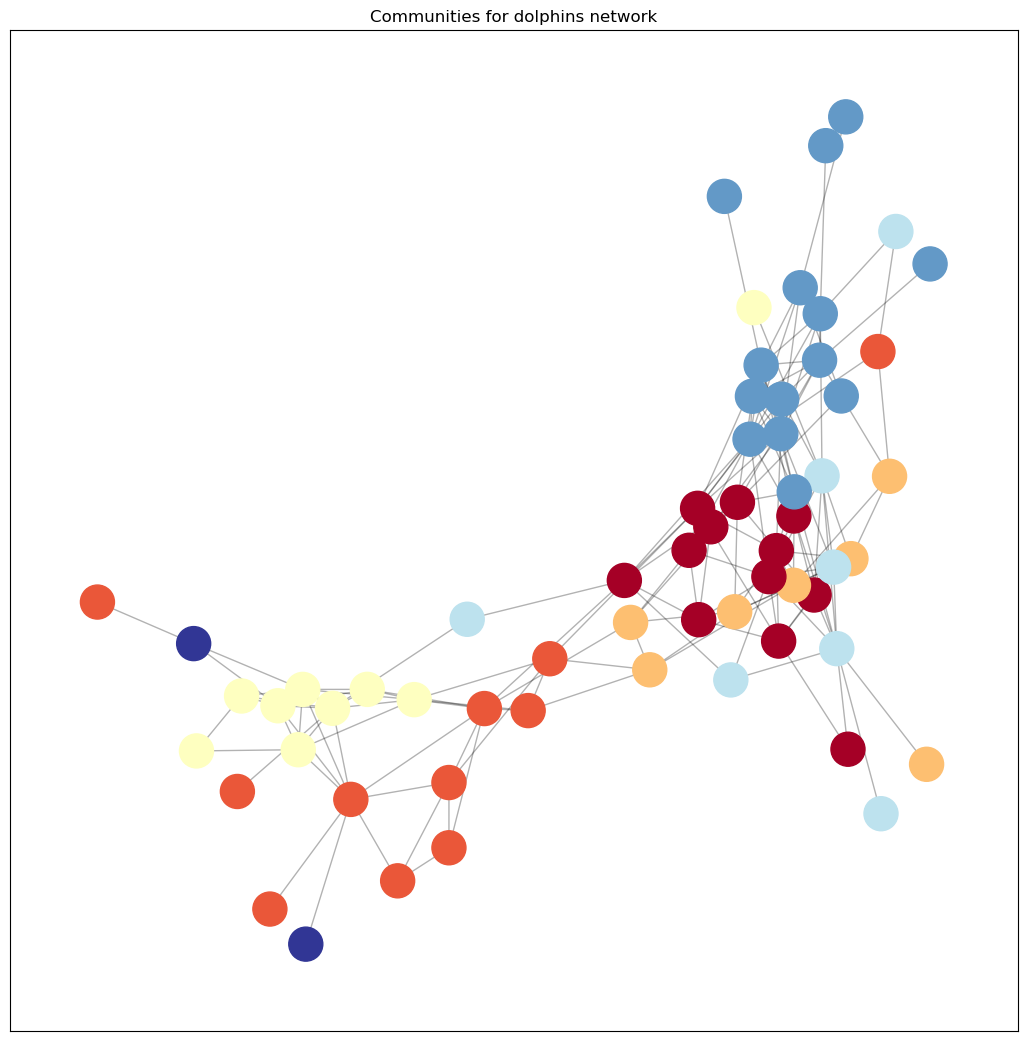

Modularity value: 0.41501522882797304
football
Graph loaded from networks/football/football_preprocessed.gml: 115 nodes and 613 edges
Number of communities: 10
Communities: [1, 2, 3, 3, 1, 3, 4, 5, 5, 1, 2, 3, 6, 2, 3, 6, 7, 7, 4, 6, 7, 5, 5, 5, 3, 2, 7, 7, 3, 6, 5, 4, 4, 2, 7, 6, 8, 2, 6, 6, 3, 7, 8, 4, 9, 2, 10, 3, 7, 4, 5, 5, 8, 10, 6, 1, 7, 4, 8, 8, 6, 3, 7, 6, 4, 7, 7, 10, 5, 10, 7, 3, 1, 10, 3, 4, 7, 5, 5, 5, 9, 10, 4, 10, 2, 1, 9, 2, 3, 8, 3, 10, 9, 1, 6, 7, 7, 3, 4, 4, 4, 1, 3, 2, 1, 6, 6, 2, 9, 2, 10, 4, 4, 7, 10]


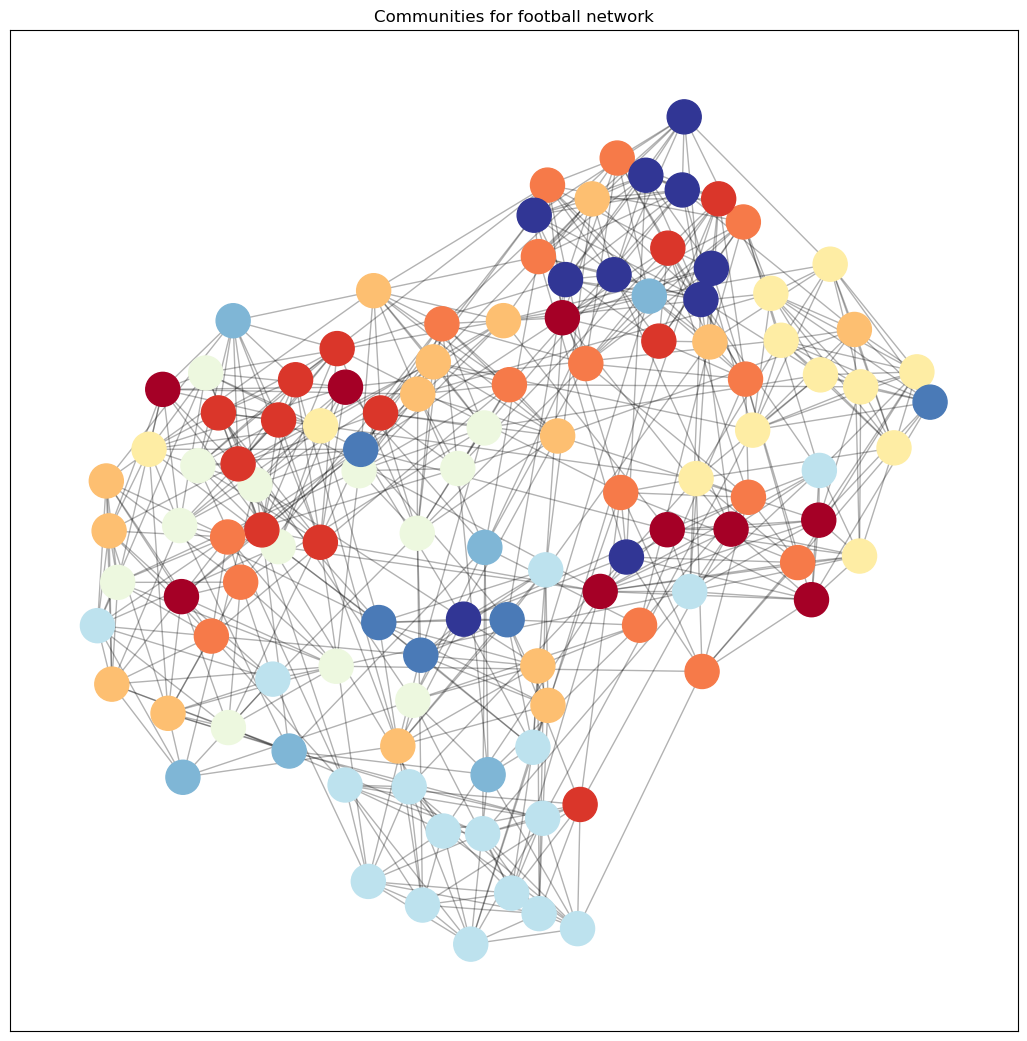

Modularity value: 0.23476124959748845
karate
Graph loaded from networks/karate/karate_preprocessed.gml: 34 nodes and 78 edges
Number of communities: 5
Communities: [1, 1, 1, 1, 2, 2, 2, 1, 3, 3, 2, 1, 1, 1, 3, 3, 2, 1, 3, 1, 3, 1, 3, 3, 4, 4, 3, 3, 5, 3, 3, 4, 3, 3]


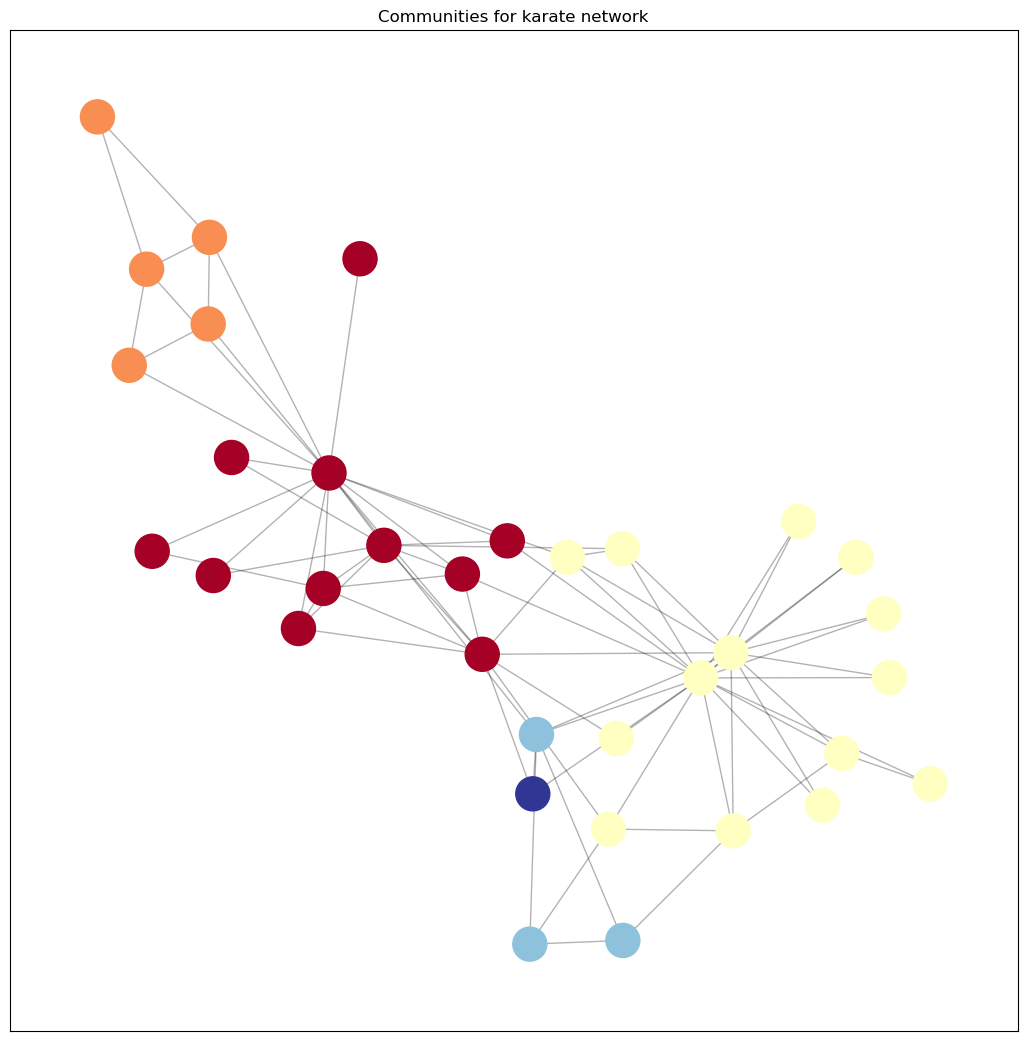

Modularity value: 0.4550460223537141
krebs
Graph loaded from networks/krebs/krebs_preprocessed.gml: 105 nodes and 441 edges
Number of communities: 10
Communities: [1, 2, 3, 3, 3, 3, 4, 3, 5, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 6, 7, 5, 4, 1, 5, 4, 1, 8, 3, 4, 8, 7, 9, 2, 7, 5, 5, 5, 4, 4, 5, 8, 5, 9, 5, 5, 5, 5, 2, 2, 4, 9, 4, 7, 8, 6, 4, 4, 9, 8, 8, 10, 8, 8, 1, 9, 10, 8, 9, 6, 4, 10, 10, 10, 10, 10, 10, 10, 3, 6, 4, 10, 10, 10, 10, 2, 1, 7, 10, 10, 10, 10, 2, 8, 10, 3, 10, 6, 4, 8, 10, 10, 3, 8, 8]


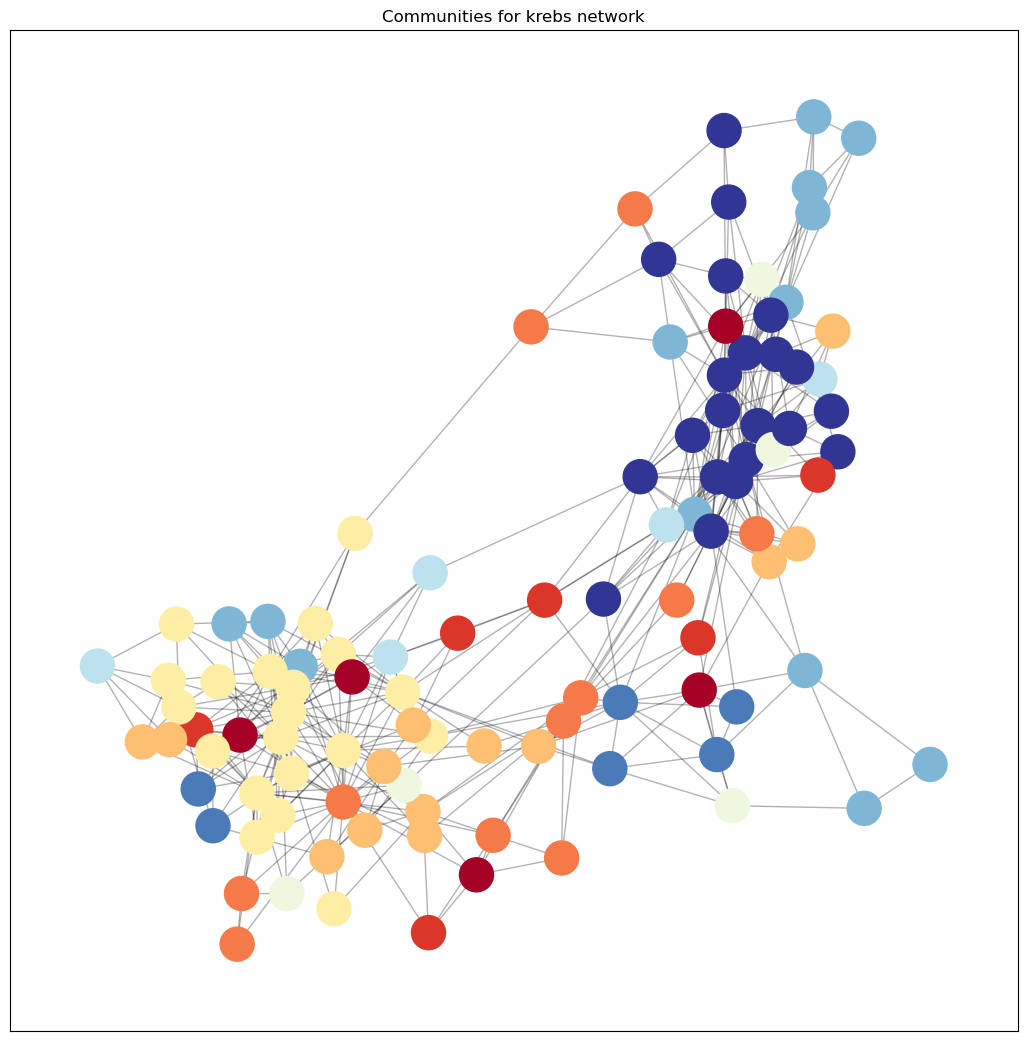

Modularity value: 0.25622297293823176


In [16]:
param = {
    'popSize': 60,
    'noGen': 50
}

problem_param = {
    'fitness': modularity_for_fitness,
    'maximize': True,
    'data': None, # va fi setat in functia compute_all_EA
    'size': None # va fi setat in functia compute_all_EA
}

compute_all_EA('dolphins', param, problem_param)
compute_all_EA('football', param, problem_param)
compute_all_EA('karate', param, problem_param)
compute_all_EA('krebs', param, problem_param)

### Functii de fitness extra

dolphins
Graph loaded from networks/dolphins/dolphins_preprocessed.gml: 62 nodes and 159 edges
Number of communities: 6
Communities: [1, 2, 3, 3, 1, 4, 5, 3, 3, 5, 1, 6, 6, 5, 3, 4, 3, 5, 4, 2, 3, 6, 5, 3, 4, 5, 5, 5, 2, 4, 2, 5, 5, 6, 3, 4, 3, 3, 3, 3, 3, 5, 1, 6, 3, 4, 1, 1, 5, 3, 3, 4, 3, 6, 3, 2, 4, 5, 6, 3, 5, 6]


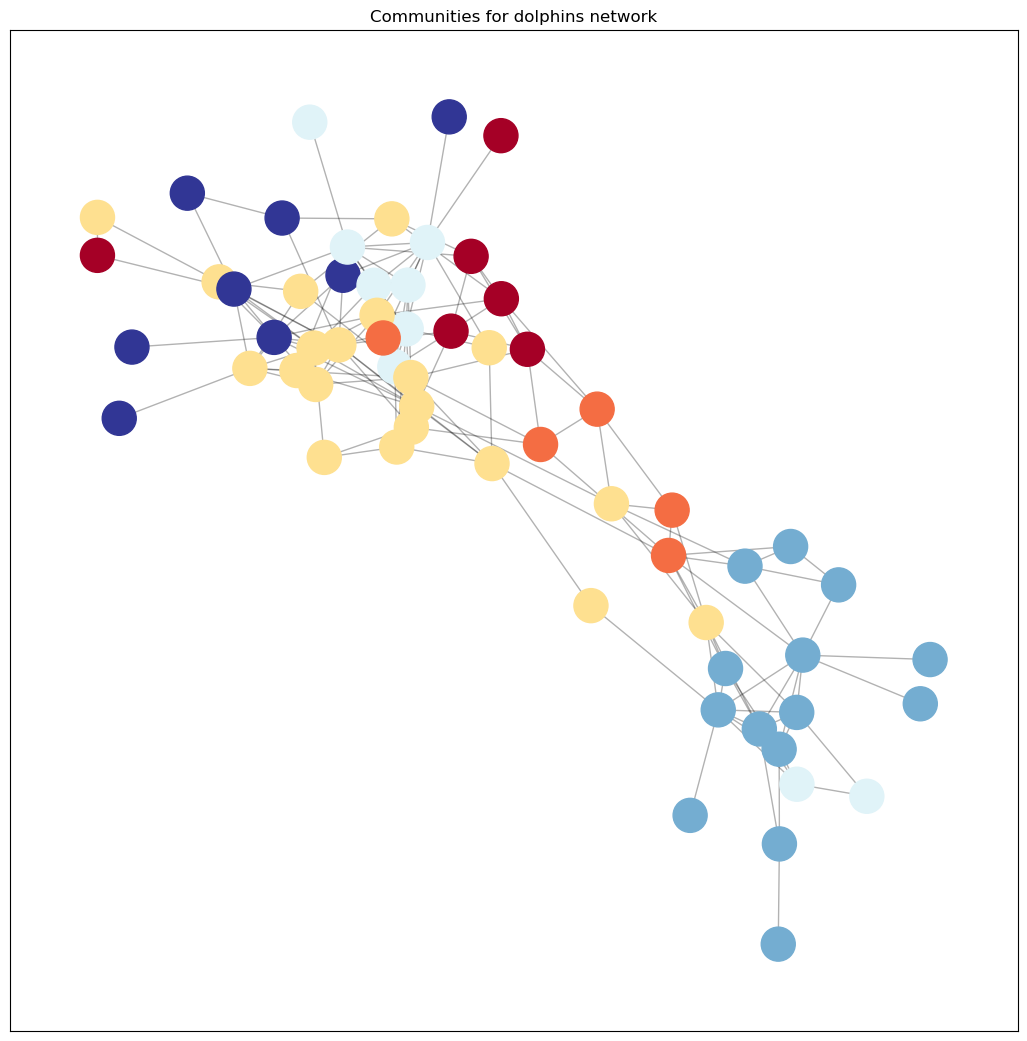

Modularity value: 0.35771923578972326
dolphins
Graph loaded from networks/dolphins/dolphins_preprocessed.gml: 62 nodes and 159 edges
Number of communities: 7
Communities: [1, 2, 1, 2, 3, 4, 4, 4, 2, 4, 1, 3, 5, 4, 5, 3, 5, 2, 3, 4, 6, 5, 2, 3, 3, 4, 4, 4, 2, 3, 1, 2, 4, 5, 5, 3, 6, 5, 7, 2, 5, 4, 1, 7, 7, 3, 3, 1, 2, 3, 5, 3, 5, 7, 4, 3, 4, 2, 7, 2, 7, 7]


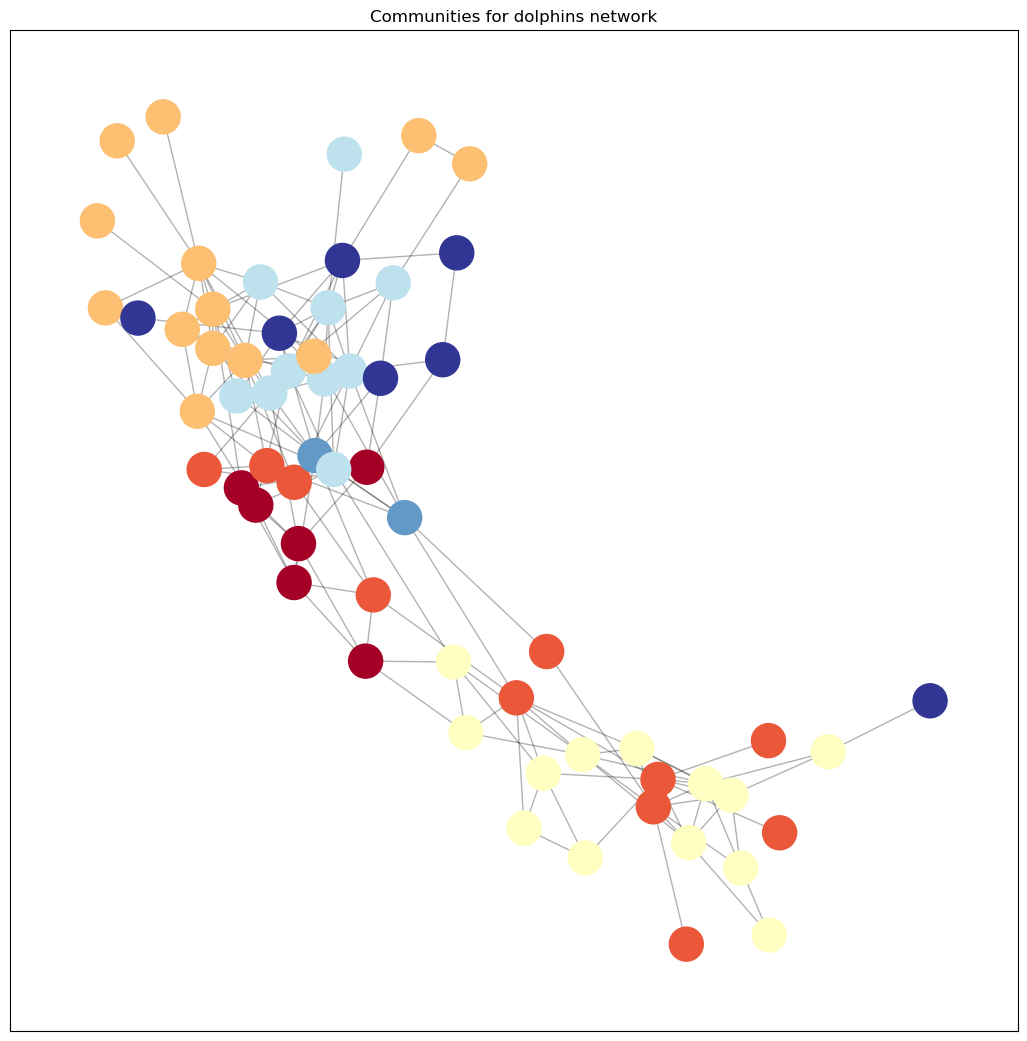

Modularity value: 0.41260234959060105


In [18]:
# functie de fitness edge_density
problem_param['fitness'] = edge_density_fitness
compute_all_EA('dolphins', param, problem_param)

# functie de fitness Silhouette-like score
problem_param['fitness'] = silhouette_fitness
compute_all_EA('dolphins', param, problem_param)